# **ExperimentNumber:- 02**

###**Split data into train/validation/test set (70-15-15) and save using train_test_split**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset and display first five rows

In [ ]:
df = pd.read_csv("/content/linear_housing_dataset.csv")
df.head()

,Age_of_House,Bedrooms,Price
0,52,4,324736
1,93,1,217391
2,15,4,368986
3,72,2,270666
4,61,2,274892


### Check null/ missing value

In [ ]:
df.isnull().sum()

,0
Age_of_House,0
Bedrooms,0
Price,0


## **Graphical representation for null value**

In [ ]:
null_matrix = df.isnull()

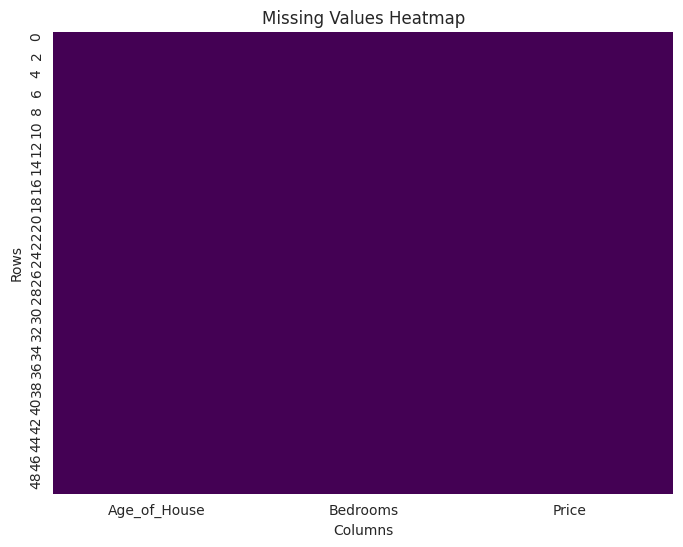

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(null_matrix, cbar= False, cmap = "viridis")
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

### Dataset info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age_of_House  50 non-null     int64
 1   Bedrooms      50 non-null     int64
 2   Price         50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


### Plot dataset using seaborn

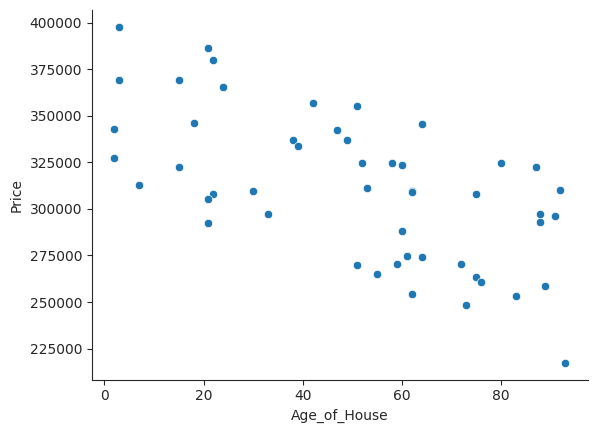

In [ ]:
import seaborn as sns
sns.set_style("ticks")
sns.scatterplot(data = df, x ="Age_of_House", y = "Price")
sns.despine()


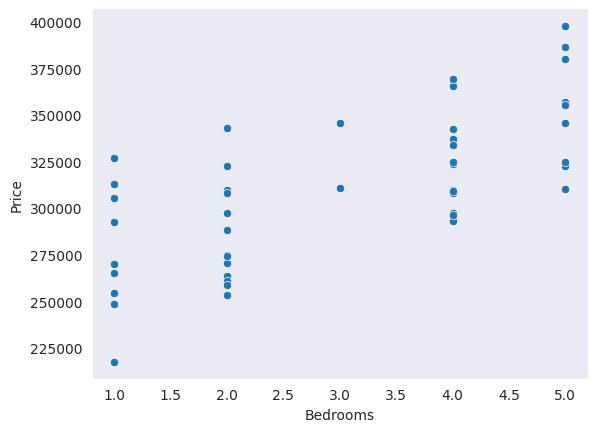

In [ ]:
sns.set_style("dark")
sns.scatterplot(data = df, x = "Bedrooms", y = "Price")
sns.despine()

## X -> Features and y -> target

In [ ]:
X = df[["Age_of_House",	"Bedrooms"]]
y = df["Price"]

### Split dataset for train, test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

**Check len**

### **Split dataset for validation**

In [ ]:
X_val, X_test_val, y_val, y_test_val = train_test_split(X_train, y_train, test_size = 0.3, random_state= 42)

## **Save dataset**

In [ ]:
X_train.to_csv("X_train.csv", index = False)

In [ ]:
X_test.to_csv("X_test.csv", index = False)

In [ ]:
y_train.to_csv("y_train.csv", index = False)

In [ ]:
y_test.to_csv("y_test.csv", index = False)

In [ ]:
X_val.to_csv("X_val.csv", index = False)

In [ ]:
X_test_val.to_csv("X_test_val.csv", index = False)

In [ ]:
y_val.to_csv("y_val.csv", index = False)

In [ ]:
y_test_val.to_csv("y_test_val.csv", index = False)

# **Model Training**

<Axes: xlabel='Age_of_House', ylabel='Price'>

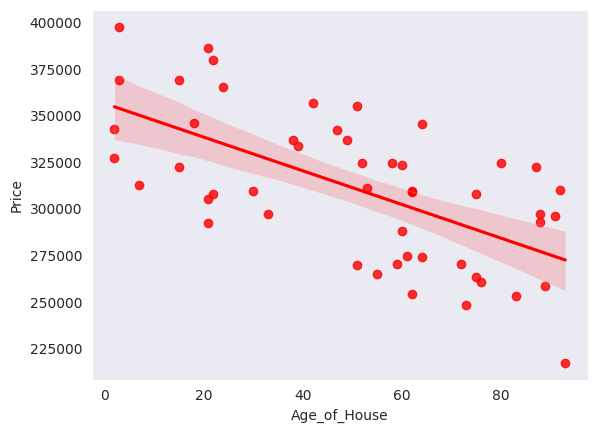

In [ ]:
sns.regplot(data = df, x = "Age_of_House", y = "Price", color = "red")

<Axes: xlabel='Bedrooms', ylabel='Price'>

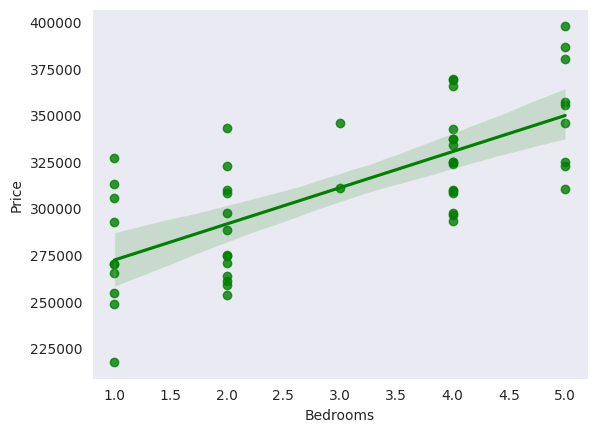

In [ ]:
sns.regplot(data= df, x = "Bedrooms", y = "Price", color='green')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predicted = model.predict(X_test)
predicted

array([381902.25061584, 320872.22476614, 259863.13429535, 311474.60850731,
       309975.34829252, 343700.37682143, 317915.57509436, 324842.33816706,
       312425.26609974, 337766.14209896])

### Calculate evaluation metrics

In [ ]:
r2 = r2_score(y_test, predicted)
print(r2)
print(mean_squared_error(y_test, predicted))
print(mean_absolute_error(y_test, predicted))

0.9346689878306833
47737533.0337616
5281.5494955472095


In [ ]:
pd.DataFrame({
    "Actual_value" : y_test,
    "Predicted_value": predicted
})

,Actual_value,Predicted_value
13,379837,381902.250616
39,309059,320872.224766
30,270174,259863.134295
45,312789,311474.608507
17,309762,309975.348293
48,333693,343700.376821
26,308206,317915.575094
25,324685,324842.338167
32,310383,312425.266100
19,342948,337766.142099
